In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import skimage.measure

In [2]:

import copy

child_last   = "└─── "
child_middle = "├─── "
space_pre    = "     "
middle_pre   = "│    "
def build_tree(obj, key='#', level=0, level_info = {}):
    if(level > 0):
        for i in range(level-1):
            if(level_info[i] == 'last'):
                print(space_pre, end="")
            else:
                print(middle_pre, end="")
        if(level_info[level-1] == 'last'):
            child_pre = child_last
        else:
            child_pre = child_middle
        print(child_pre, end="")
    
    if(key != '#'):
        print(key, end=": ")
    print(type(obj), end=" ")
    if(type(obj) is list):
        print("[{}]".format(len(obj)))
    else:
        print()
    if(type(obj) is dict):
        key_arr = list(obj.keys())
        for idx in range(len(key_arr)):
            li = copy.deepcopy(level_info)
            if(idx == len(key_arr)-1):
                li[level] = 'last'
            else:
                li[level] = 'middle'
            
            key = key_arr[idx]
            build_tree(obj[key], key=key, level = level + 1, level_info = li)
    elif(type(obj) is list):
        li = copy.deepcopy(level_info)
        li[level] = 'last'
        build_tree(obj[0], key='#', level = level + 1, level_info = li)

In [3]:
def getSecondFromTimeStamp(timestamp):
    return timestamp["hour"]*60*60 + timestamp["minute"]*60 + timestamp["seconds"]

In [4]:
def gaze__processOneSession(gaze_arr, latest = None):
    xrr = []
    yrr = []
    if(latest != None and len(gaze_arr) > 0):
        endtime = getSecondFromTimeStamp(gaze_arr[-1]["timestamp"])
    for gaze in gaze_arr:
        if(latest != None):
            curr_time = getSecondFromTimeStamp(gaze["timestamp"])
            if(endtime - curr_time > latest):
                continue
        xrr.append(gaze["gaze"]["x"])
        yrr.append(gaze["gaze"]["y"])
    return np.array(xrr), np.array(yrr)

In [5]:
path_root = "/home/arnab/MEGAsync/Research/Attention Tracking/Eye Tracking/Data_Backup/saved_sessions_latest/"

In [6]:
session_name = "session_2021-09-24T10:10:40.966059/session_2021-09-24T10:10:40.966059.json"
with open(path_root + session_name, 'r') as f:
    session = json.load(f)

In [7]:
build_tree(session)

<class 'dict'> 
└─── hdehheeafrlqlylodn58si: <class 'list'> [241]
     └─── <class 'dict'> 
          ├─── gaze: <class 'dict'> 
          │    ├─── x: <class 'float'> 
          │    └─── y: <class 'float'> 
          ├─── gazefeatures: <class 'dict'> 
          │    ├─── gaze: <class 'list'> [2]
          │    │    └─── <class 'int'> 
          │    └─── screen: <class 'list'> [2]
          │         └─── <class 'int'> 
          ├─── face: <class 'list'> [468]
          │    └─── <class 'list'> [3]
          │         └─── <class 'int'> 
          └─── timestamp: <class 'dict'> 
               ├─── hour: <class 'int'> 
               ├─── minute: <class 'int'> 
               ├─── seconds: <class 'int'> 
               └─── milliseconds: <class 'int'> 


In [8]:
xrr, yrr = gaze__processOneSession(session['hdehheeafrlqlylodn58si'], 10)
xrr.shape, yrr.shape

((124,), (124,))

In [9]:
# marker_track = {
#     "Position 1":   [.5, .5],
#     "Position 2":   [.1, .1],	
#     "Position 3":   [.1, .8],	
#     "Position 4":	[.8, .8],	
#     "Position 5":	[.8, .1],	
# }

accuracy_cords = [
    {'x': 50, 'y': 50},
    {'x': 10, 'y': 10},
    {'x': 10, 'y': 50},
    {'x': 10, 'y': 90},
    {'x': 50, 'y': 10},
    {'x': 50, 'y': 90},
    {'x': 90, 'y': 10},
    {'x': 90, 'y': 50},
    {'x': 90, 'y': 90},
]

marker_track = {}
for i in range(len(accuracy_cords)):
    marker_track["Position {}".format(i+1)] = [accuracy_cords[i]['x']/100, accuracy_cords[i]['y']/100]

print(len(marker_track.keys()))
marker_track

9


{'Position 1': [0.5, 0.5],
 'Position 2': [0.1, 0.1],
 'Position 3': [0.1, 0.5],
 'Position 4': [0.1, 0.9],
 'Position 5': [0.5, 0.1],
 'Position 6': [0.5, 0.9],
 'Position 7': [0.9, 0.1],
 'Position 8': [0.9, 0.5],
 'Position 9': [0.9, 0.9]}

In [10]:
with open("session_track.json", 'r') as f:
    session_track = json.load(f)
session_track

{'template': {'glass': 0,
  'gender': 'male',
  'brightness': -1,
  'camera_res': {'mega_pixels': 2, 'frame_per_second': 30},
  'sessions': {'Position 1': '',
   'Position 2': '',
   'Position 3': '',
   'Position 4': '',
   'Position 5': '',
   'Position 6': '',
   'Position 7': '',
   'Position 8': '',
   'Position 9': '',
   'Right': '',
   'Left': '',
   'Up': '',
   'Down': '',
   'Blink': ''}},
 'P0': {'glass': 0,
  'gender': 'male',
  'brightness': -1,
  'camera_res': {'mega_pixels': 2, 'frame_per_second': 30},
  'sessions': {'Position 1': 'session_2021-09-24T10:09:59.226067.json',
   'Position 2': 'session_2021-09-24T10:10:40.966059.json',
   'Position 3': 'session_2021-09-24T10:11:12.264553.json',
   'Position 4': 'session_2021-09-24T10:11:40.039892.json',
   'Position 5': 'session_2021-09-24T10:12:05.820481.json',
   'Right': 'session_2021-09-24T10:13:07.759221.json',
   'Left': 'session_2021-09-24T10:13:32.368622.json',
   'Up': 'session_2021-09-24T10:13:59.251024.json',
   

In [11]:
def loadjson_singleSession(session_name):
    folder = session_name.split('.json')[0]
    with open(path_root + folder + "/" + session_name, 'r') as f:
        session = json.load(f)
        if(len(session.keys()) != 1):
            print("{} session has {} ids".format(session_name, len(session.keys())))
        ret_session = []
        ret_len = 0
        for id in session:
            if(len(session[id]) > ret_len):
                ret_len = len(session[id])
                ret_session = session[id]
        return ret_session

In [12]:
def calculate_MSE(xrr, yrr, marker_x, marker_y):
    ret = 0
    for idx in range(xrr.shape[0]):
        ret += ((marker_x - xrr[idx]))**2 + ((marker_y - yrr[idx]))**2
    return ret/xrr.shape[0]

In [13]:
def plotHeatmap(xrr, yrr, subplot):
    heat_map = np.zeros((1001, 1001))
    for idx in range(xrr.shape[0]):
        xx = int(round(xrr[idx]*1000))
        yy = int(round(yrr[idx]*1000))

        xx = max(0, xx)
        xx = min(xx, 1000)
        yy = max(0, yy)
        yy = min(yy, 1000)

        heat_map[yy, xx] += 1
    print("heatmap shape", heat_map.shape)
    heatmap_reduced = skimage.measure.block_reduce(heat_map, (100,100), np.mean)
    print(heatmap_reduced.shape, heatmap_reduced.min(), heatmap_reduced.max())
    subplot.pcolormesh(np.arange(11), np.arange(11), heatmap_reduced, 
                    shading='gouraud', 
                    vmin=heatmap_reduced.min(), 
                    vmax=heatmap_reduced.max())
    subplot.invert_yaxis()

In [14]:
not_valid = ["template", "P0", "P0_", "P17"]

def loadjson__multileSession(position_key, time_limit = 15, _filter = {"glass": -1, "gender": -1, "brightness": -1, "camera_res": -1}):
    combined_xrr = np.array([])
    combined_yrr = np.array([])
    individual_mse = []
    counter = 0
    for participant in session_track:
        # print(" >> ", participant, " -- glass:", session_track[participant]["glass"])
        if participant in not_valid:
            continue
        # if glass != -1 and session_track[participant]["glass"] != glass:
        #     continue
        skip = False
        for key in _filter:
            if(key != "camera_res"):
                val = session_track[participant][key]
            else:
                val = session_track[participant]["camera_res"]["mega_pixels"]
            # print(key, " >> ", _filter[key], " <><> ", val)
            if(_filter[key] != -1 and val != _filter[key]):
                skip = True

        if(skip):
            continue
        # print(" >> ", participant, " -- glass:", session_track[participant]["glass"], end=" <> ")
        
        json_session = loadjson_singleSession(session_track[participant]['sessions'][position_key])
        xrr, yrr = gaze__processOneSession(json_session, time_limit)
        # print("Shape: ", xrr.shape, yrr.shape)

        individual_mse.append(calculate_MSE(xrr, yrr, marker_track[position_key][0], marker_track[position_key][1]))
        combined_xrr = np.concatenate((combined_xrr, xrr))
        combined_yrr = np.concatenate((combined_yrr, yrr))
        counter += 1
     
    print("Found {} participants >> Combined shape".format(counter), combined_xrr.shape, combined_yrr.shape)
    return combined_xrr, combined_yrr, individual_mse, counter

In [15]:
multisession = loadjson__multileSession("Position 2", _filter = {"glass": 1, "gender": "female", "brightness": -1, "camera_res": -1})
multisession

Found 3 participants >> Combined shape (643,) (643,)


(array([ 0.071,  0.064,  0.079,  0.07 ,  0.046,  0.046,  0.068,  0.087,
         0.09 ,  0.087,  0.078,  0.075,  0.084,  0.092,  0.073,  0.098,
         0.094,  0.121,  0.096,  0.07 ,  0.041,  0.061,  0.105,  0.078,
         0.111,  0.101,  0.081,  0.117,  0.102,  0.073,  0.073,  0.089,
         0.079,  0.085,  0.083,  0.061,  0.089,  0.104,  0.036,  0.017,
         0.083,  0.087,  0.057,  0.085,  0.08 ,  0.081,  0.105,  0.146,
         0.124,  0.119,  0.09 ,  0.109,  0.071,  0.028,  0.036,  0.029,
         0.026,  0.032,  0.018,  0.007,  0.034,  0.008,  0.061,  0.062,
         0.035,  0.055,  0.042,  0.028,  0.039,  0.046,  0.047,  0.036,
         0.048,  0.071,  0.045,  0.018,  0.027,  0.038,  0.036,  0.018,
         0.033,  0.072,  0.074,  0.049,  0.044,  0.041,  0.038,  0.029,
         0.038,  0.04 ,  0.033,  0.074,  0.126,  0.115,  0.052,  0.089,
         0.051,  0.103,  0.101,  0.133,  0.1  ,  0.12 ,  0.089,  0.079,
         0.082,  0.092,  0.076,  0.085,  0.072,  0.068,  0.074, 

(643,) (643,) 3
[0.11582195039164493, 0.10750535227272731, 0.0948180833333333]


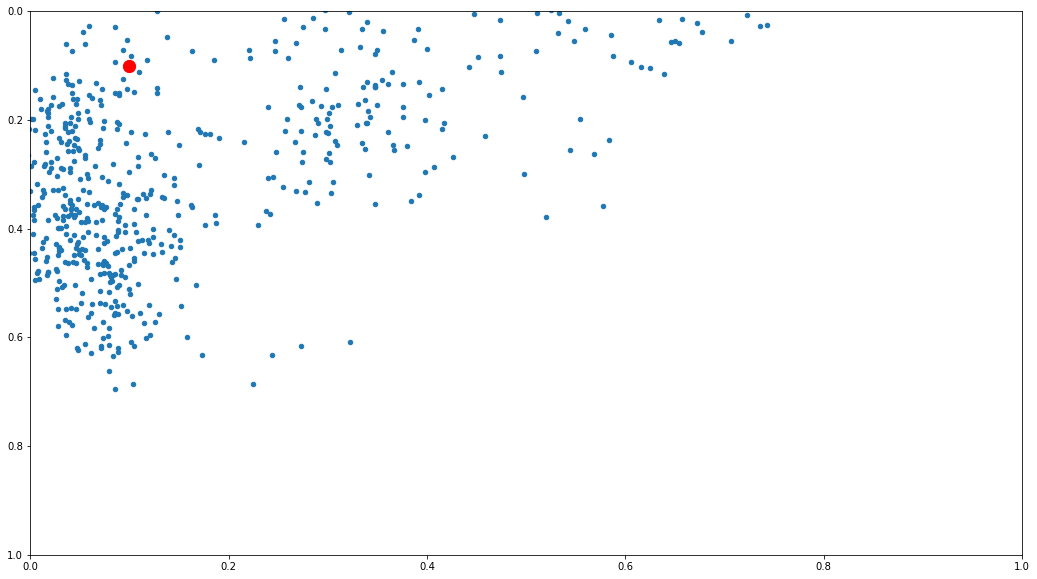

In [16]:
xrr, yrr, mse_arr, counter = multisession
print(xrr.shape, yrr.shape, counter)
print(mse_arr)
scle = 10
plt.rcParams["figure.figsize"] = (scle*16/9,scle)
plt.scatter(xrr, yrr, scle*2)
plt.xlim([0,1])
plt.ylim([0,1])
plt.gca().invert_yaxis()
plt.scatter(marker_track["Position 2"][0], marker_track["Position 2"][1], color='red', s=scle*15)

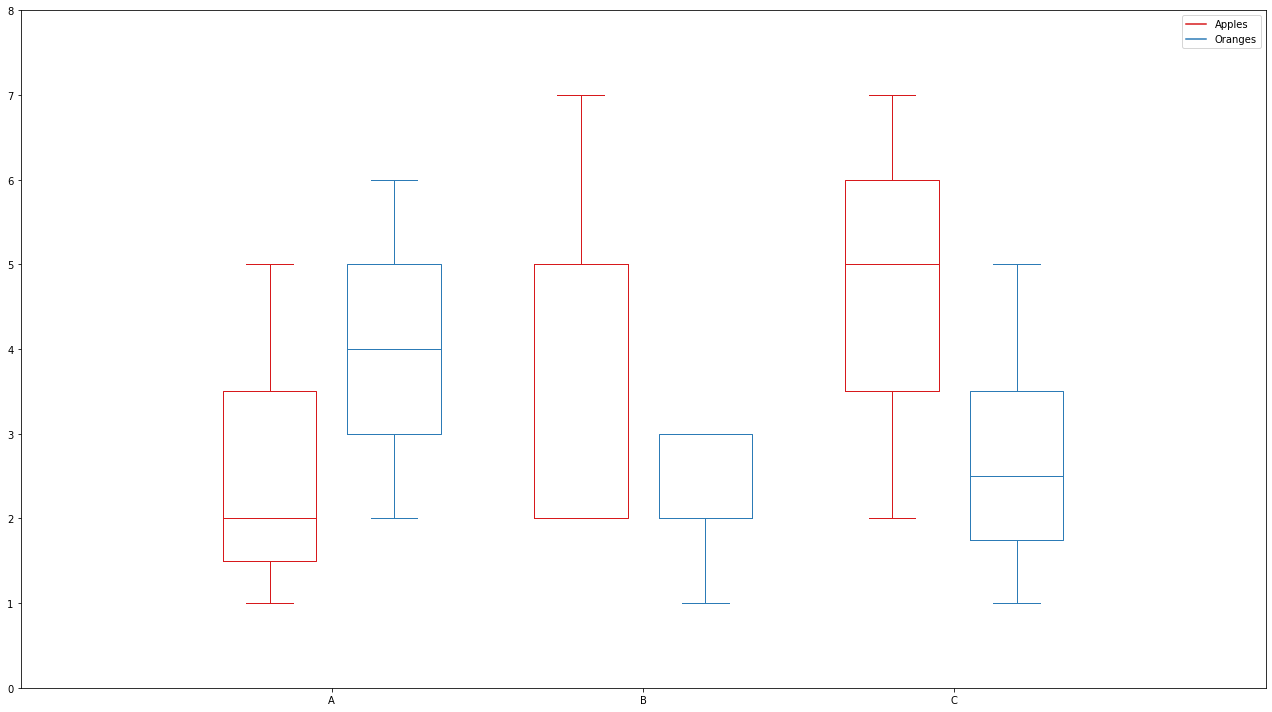

In [17]:
data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

ticks = ['A', 'B', 'C']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Apples')
plt.plot([], c='#2C7BB6', label='Oranges')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare.png')

In [20]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df, y="total_bill")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed